#**PROBLEMA DE NEGOCIO**


---


Una agencia inmobiliaria en California necesita mejorar su estrategia de precios para optimizar la compra y venta de propiedades. Actualmente, no se están considerando adecuadamente las variables espaciales, como la distancia a la costa y la proximidad a ciudades importantes, lo que afecta la rentabilidad. El objetivo del proyecto es desarrollar un modelo predictivo que, usando datos de geolocalización (latitud, longitud, distancia a la costa) y características del inmueble, permita estimar con precisión el precio de las viviendas y mejorar la toma de decisiones en su estrategia de precios.

## Data Dictionary

| Column Name                    | Description                                                                                                            |
| ------------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| **Median\_House\_Value**       | The **median price** of houses in the block (typically in dollars).                                                    |
| **Median\_Income**             | The **median income** of households in the block (in tens of thousands of dollars). For example, 8.3 means \~\$83,000. |
| **Median\_Age**                | The **median age** of the houses (in years). A higher value means older housing stock.                                 |
| **Tot\_Rooms**                 | Total number of **rooms** in all houses in the block (not average per house).                                          |
| **Tot\_Bedrooms**              | Total number of **bedrooms** in all houses in the block (not average per house).                                       |
| **Population**                 | Total number of **people living** in that block.                                                                       |
| **Households**                 | Total number of **households** (family units or housing units) in that block.                                          |
| **Latitude**                   | **Geographic latitude** of the block’s center (used for mapping).                                                      |
| **Longitude**                  | **Geographic longitude** of the block’s center (used for mapping).                                                     |
| **Distance\_to\_coast**        | Approximate **distance from the block to the nearest point on the coast** (likely in meters).                          |
| **Distance\_to\_LA**           | Distance from the block to **Los Angeles** (likely in meters).                                                         |
| **Distance\_to\_SanDiego**     | Distance from the block to **San Diego** (likely in meters).                                                           |
| **Distance\_to\_SanJose**      | Distance from the block to **San Jose** (likely in meters).                                                            |
| **Distance\_to\_SanFrancisco** | Distance from the block to **San Francisco** (likely in meters).                                                       |

---

**Note:** If distances seem very large, they are probably in **meters**. You can convert them to kilometers by dividing by 1,000.


In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Juan\anaconda3\python.exe -m pip install --upgrade pip


#**1. Configuración del Ambiente**


---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium as fl
from folium.plugins import MiniMap
from folium.plugins import FloatImage
from folium.plugins import HeatMap

pd.set_option('display.precision', 2)

#**2. Exploración de Datos**


---

In [8]:
# Cargar dataset desde un archivo CSV (ajusta la ruta a tu archivo)
data = pd.read_csv('../data/California_Houses.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [9]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.33,41,880,129,322,126,37.88,-122.23,9263.04,556529.16,735501.81,67432.52,21250.21
1,358500.0,8.30,21,7099,1106,2401,1138,37.86,-122.22,10225.73,554279.85,733236.88,65049.91,20880.60
2,352100.0,7.26,52,1467,190,496,177,37.85,-122.24,8259.09,554610.72,733525.68,64867.29,18811.49
3,341300.0,5.64,52,1274,235,558,219,37.85,-122.25,7768.09,555194.27,734095.29,65287.14,18031.05
4,342200.0,3.85,52,1627,280,565,259,37.85,-122.25,7768.09,555194.27,734095.29,65287.14,18031.05


In [10]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,2.06e+04,2.06e+04,20640.00,20640.00
mean,206855.82,3.87,28.64,2635.76,537.90,1425.48,499.54,35.63,-119.57,40509.26,2.69e+05,3.98e+05,349187.55,386688.42
std,115395.62,1.90,12.59,2181.62,421.25,1132.46,382.33,2.14,2.00,49140.04,2.48e+05,2.89e+05,217149.88,250122.19
min,14999.00,0.50,1.00,2.00,1.00,3.00,1.00,32.54,-124.35,120.68,4.21e+02,4.85e+02,569.45,456.14
25%,119600.00,2.56,18.00,1447.75,295.00,787.00,280.00,33.93,-121.80,9079.76,3.21e+04,1.59e+05,113119.93,117395.48
50%,179700.00,3.53,29.00,2127.00,435.00,1166.00,409.00,34.26,-118.49,20522.02,1.74e+05,2.15e+05,459758.88,526546.66
75%,264725.00,4.74,37.00,3148.00,647.00,1725.00,605.00,37.71,-118.01,49830.41,5.27e+05,7.06e+05,516946.49,584552.01
max,500001.00,15.00,52.00,39320.00,6445.00,35682.00,6082.00,41.95,-114.31,333804.69,1.02e+06,1.20e+06,836762.68,903627.66


In [11]:
data.duplicated().sum()

0

<Axes: xlabel='Longitude', ylabel='Latitude'>

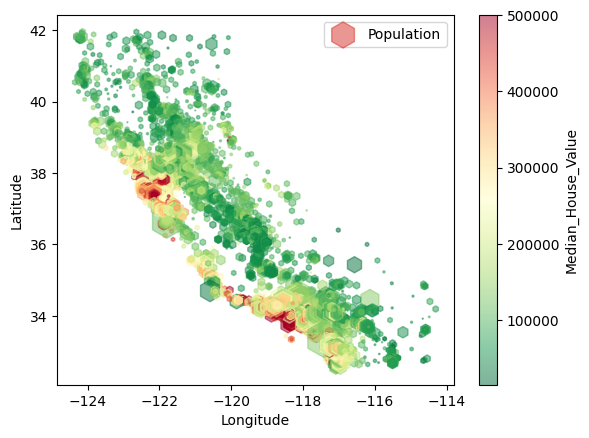

In [12]:

data.plot.scatter(x="Longitude", y="Latitude",marker="h",alpha=0.5,s=data["Population"]/50,label="Population",c="Median_House_Value",cmap=plt.get_cmap("RdYlGn_r"))

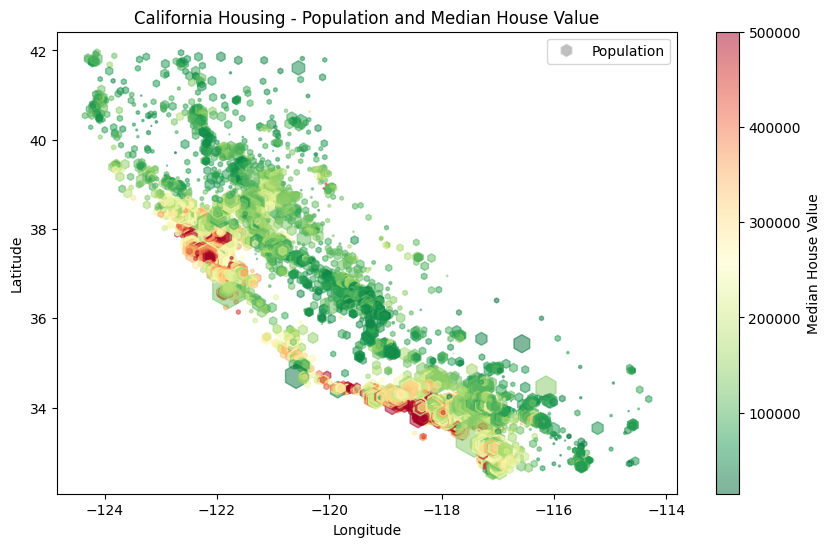

In [50]:


plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data["Longitude"],
    data["Latitude"],
    alpha=0.5,
    s=data["Population"] / 40,
    c=data["Median_House_Value"],
    cmap="RdYlGn_r",
    marker='h'  # Hexagon
)

# Color legend for Median_House_Value
cbar = plt.colorbar(scatter)
cbar.set_label("Median House Value")

# Add a title and axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing - Population and Median House Value")

# Optional: add a custom legend for 'Population' (bubble size)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='h', color='w', label='Population',
           markerfacecolor='gray', markersize=10, alpha=0.5)
]
plt.legend(handles=legend_elements)
plt.savefig("scatter_population_medianhousevalue.png", dpi=300, bbox_inches='tight')
plt.show()


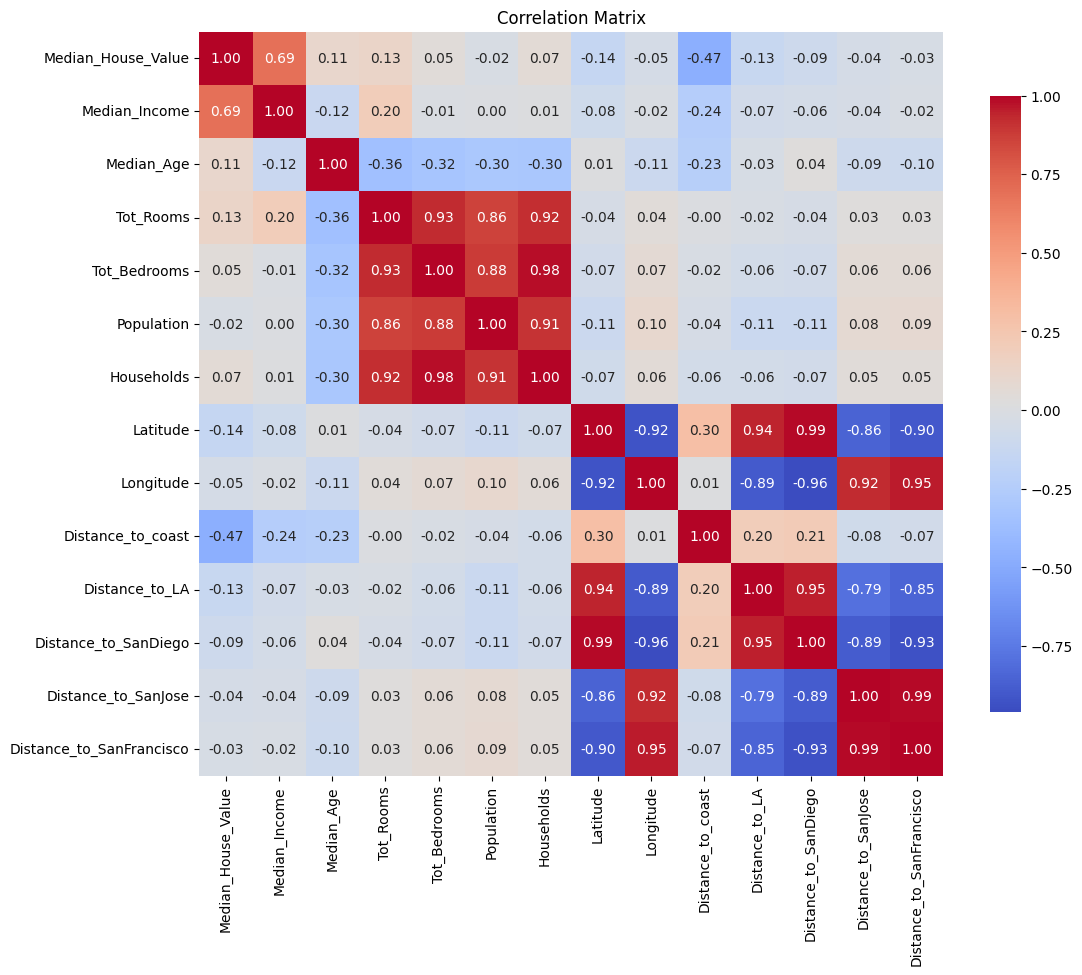

In [52]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,         # show values
    fmt=".2f",          # format to 2 decimal places
    cmap="coolwarm",    # color palette
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix")
plt.show()
# Crear el mapa de calor
#Tu código aquí

# **3. Preprocesamiento de Datos**


---

 ## 3.1 Evaluando Outliers

In [54]:
def clear_hist(df,x):
  if pd.api.types.is_numeric_dtype(df[x]):
       # Create a new figure to avoid overlapping plots
        plt.figure(figsize=(8, 4))
        
        # Plot histogram of the selected column
        plt.hist(df[x].dropna(), bins=30, color='skyblue', edgecolor='black')
        
        # Add a title using the column name
        plt.title(f"Histogram of {x}")
        
        # Add x-axis label
        plt.xlabel(x)
        
        # Add y-axis label (frequency/count)
        plt.ylabel("Frequency")
        
        # Display the plot
        plt.show()
      

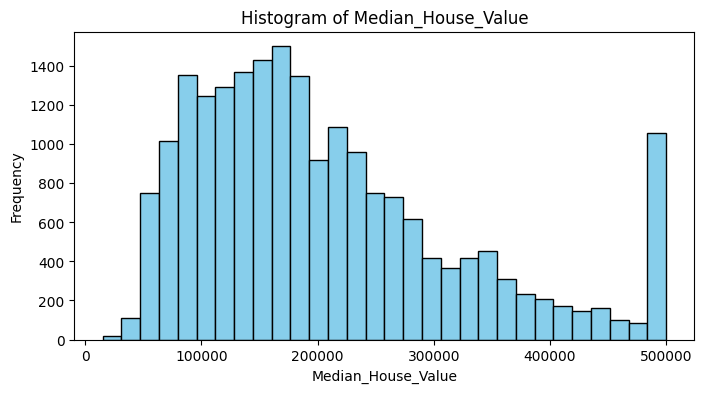

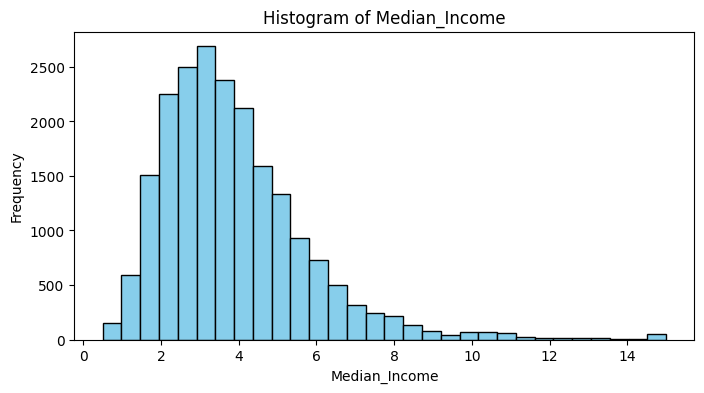

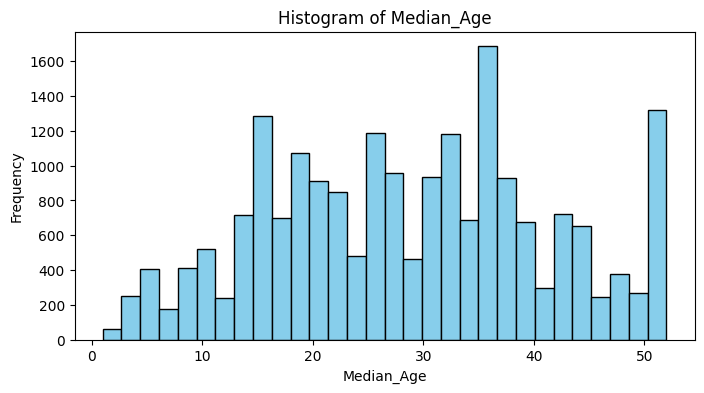

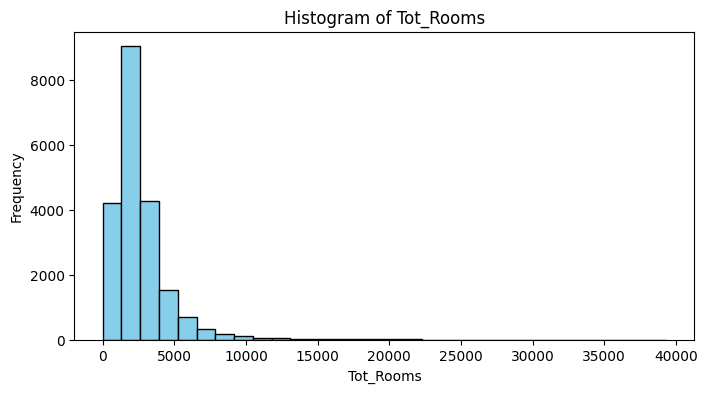

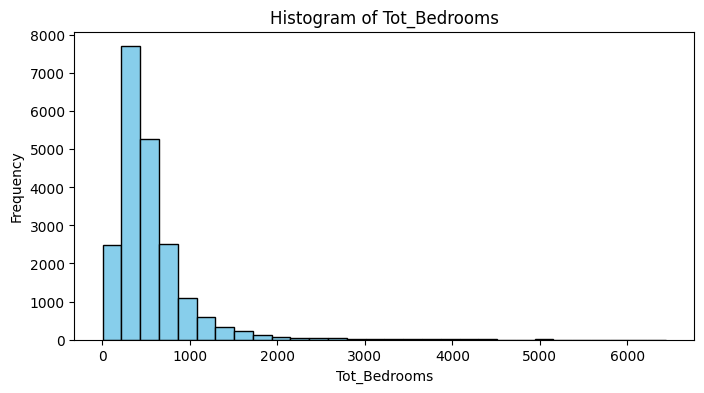

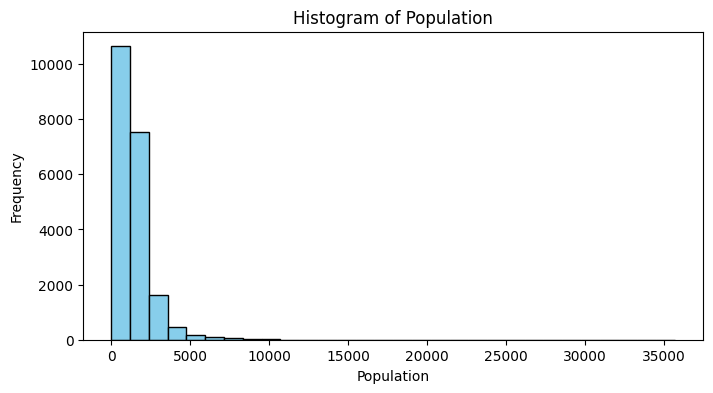

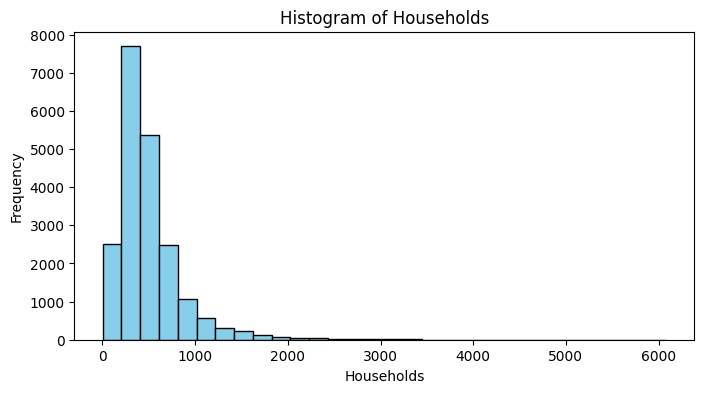

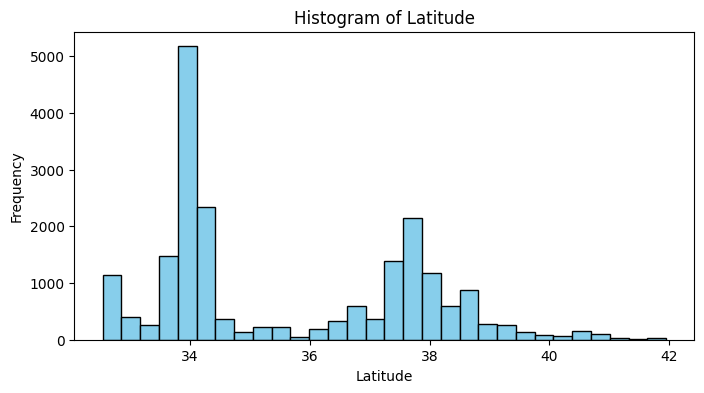

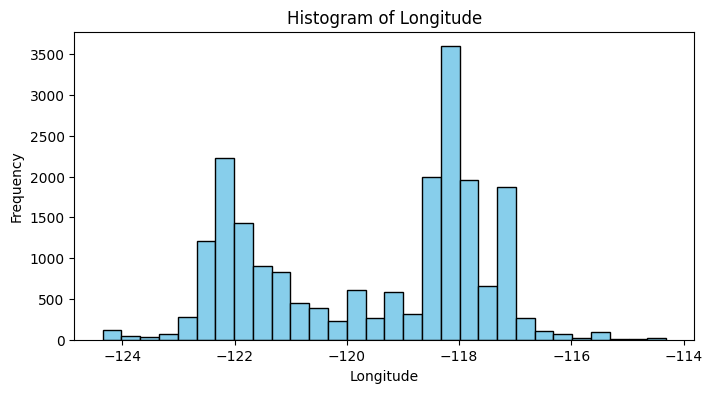

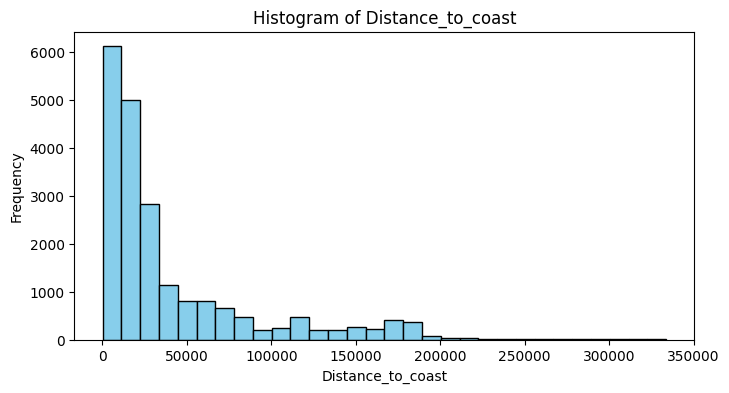

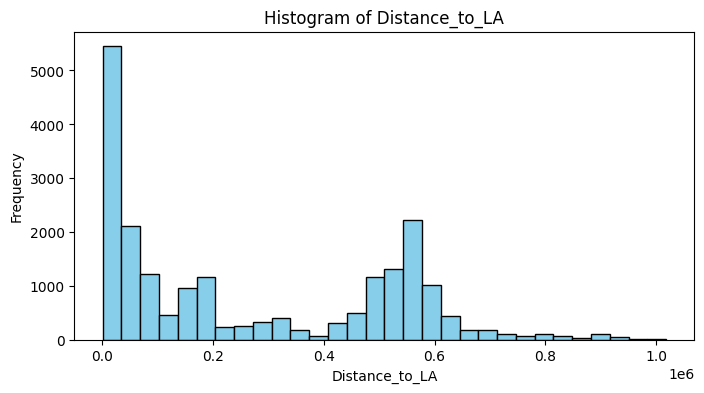

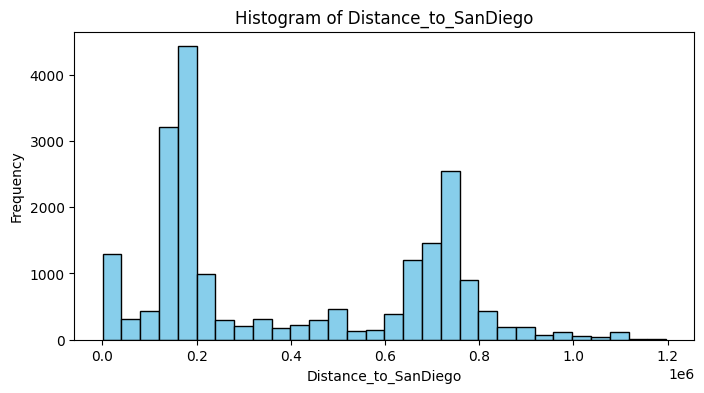

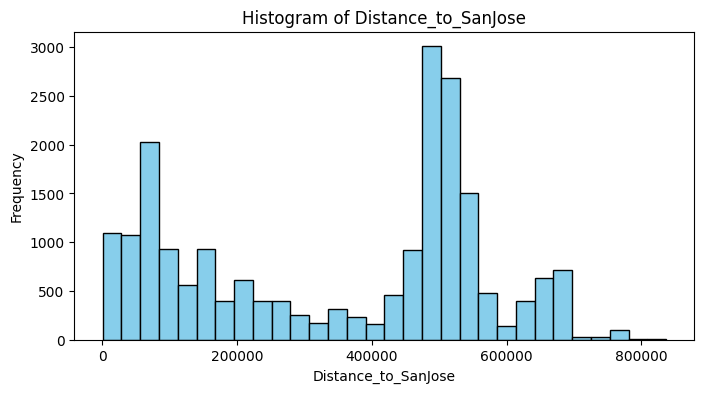

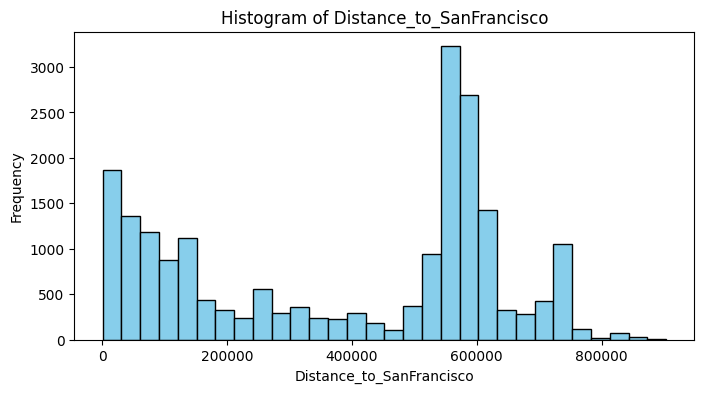

In [56]:
for x in data.columns:
  clear_hist(data,x)

In [58]:
def clear_boxplot(df, x):
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[x]):
        # Create a new figure to avoid plot overlaps
        plt.figure(figsize=(8, 4))

        # Create a boxplot for the column (drop NaNs)
        plt.boxplot(df[x].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'))

        # Add title and labels
        plt.title(f"Boxplot of {x}")
        plt.xlabel(x)

        # Show the plot
        plt.show()


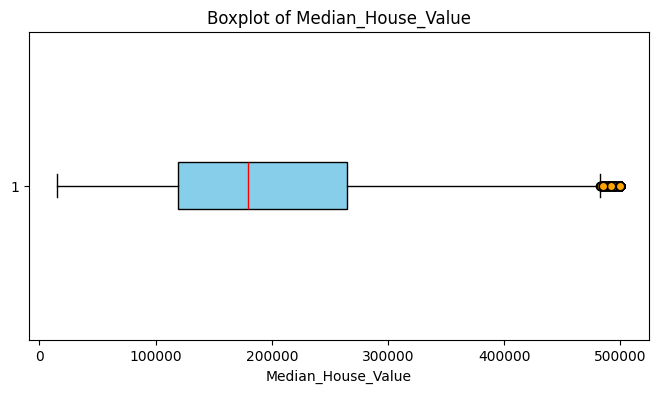

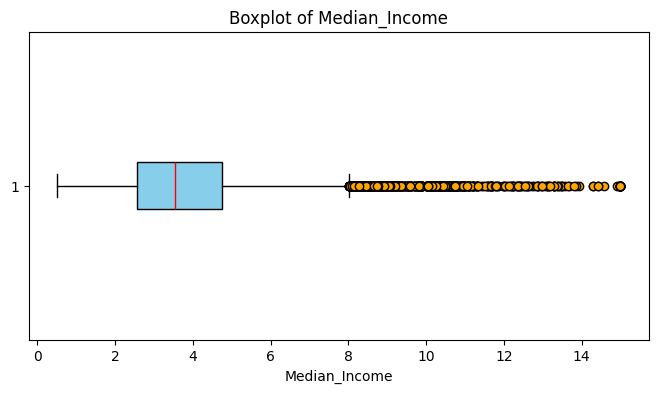

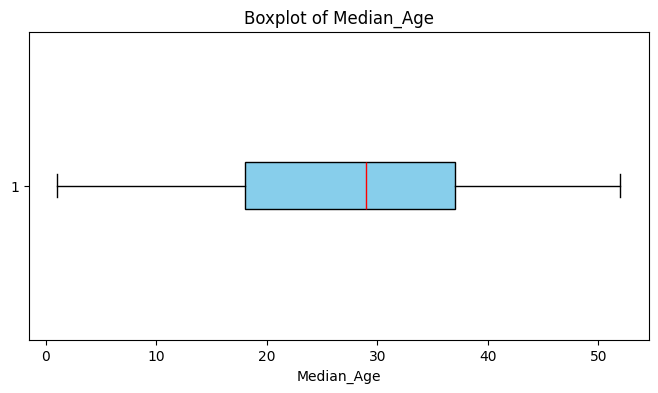

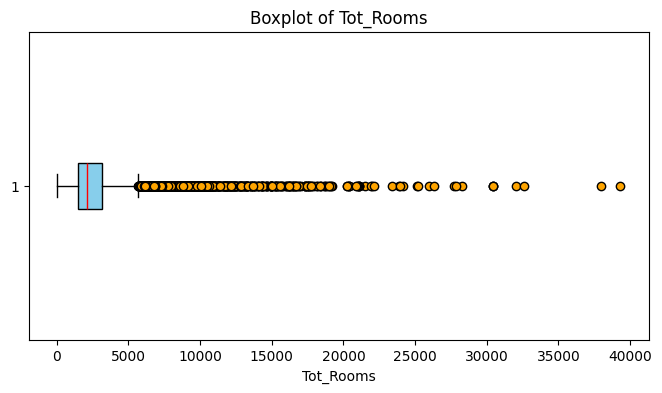

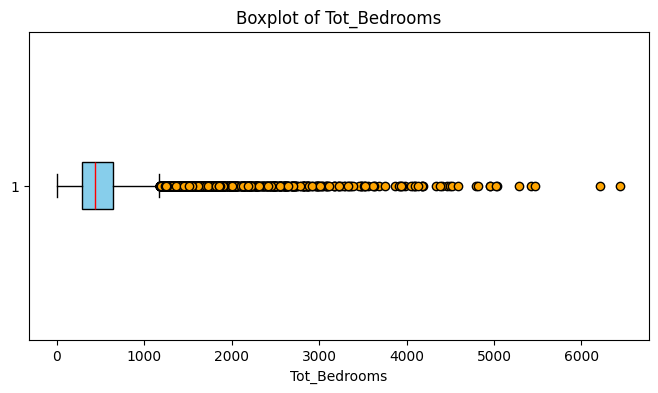

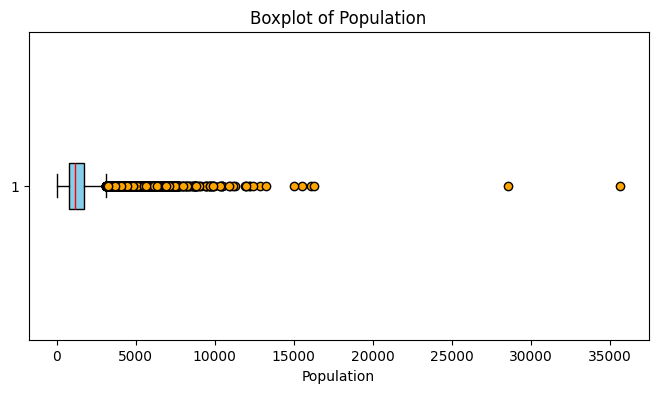

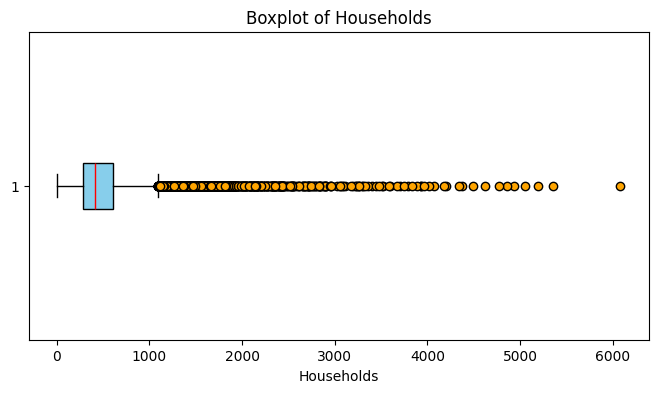

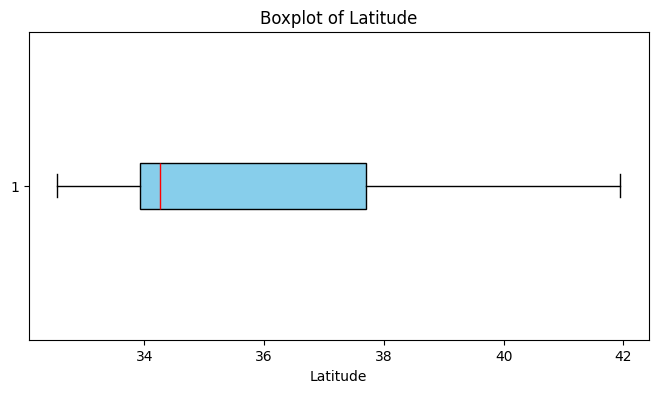

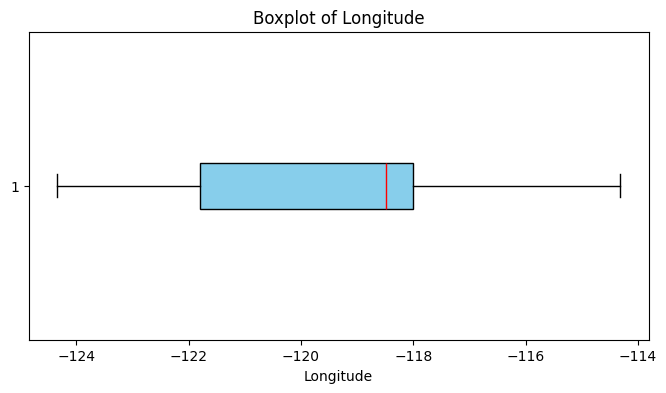

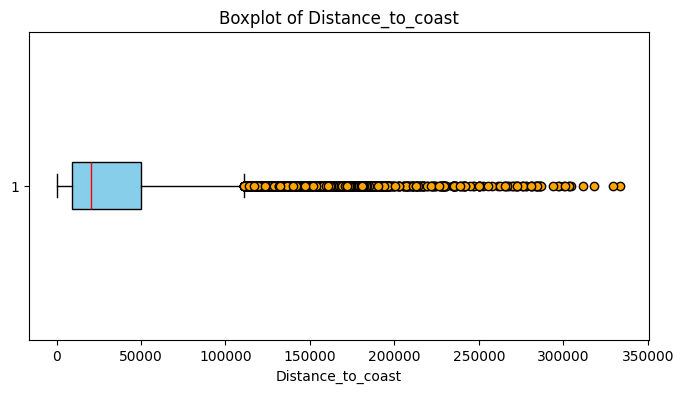

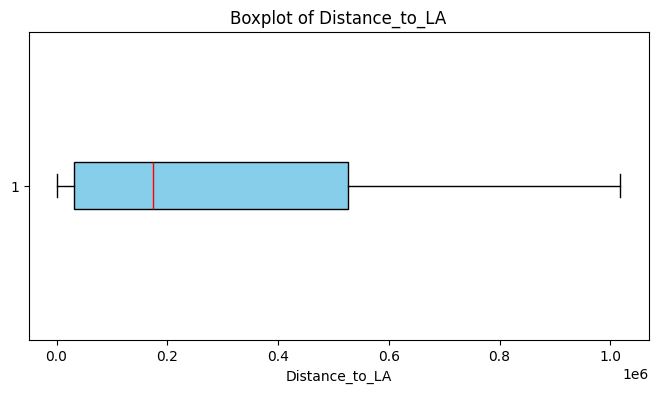

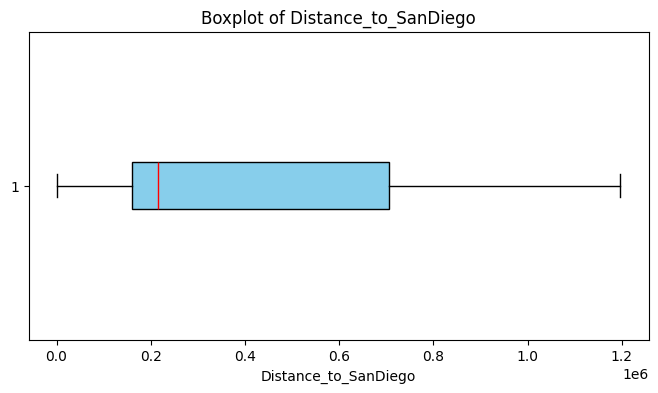

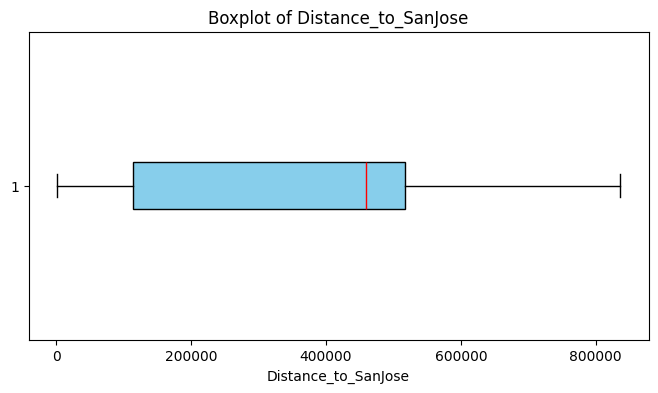

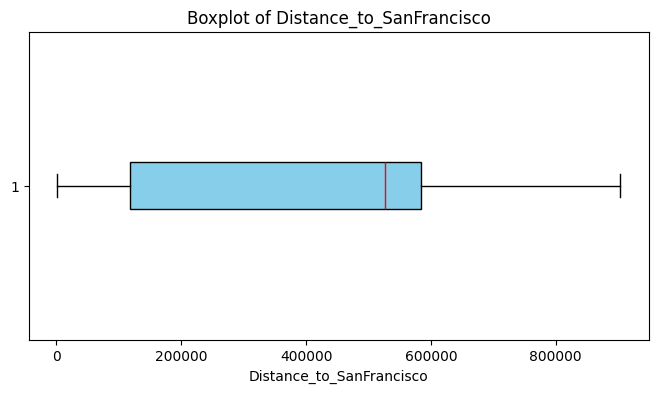

In [60]:
for x in data.columns:
  clear_boxplot(data,x)

## 3.2 Truncando variables

In [62]:
limits = {'Median_House_Value':(data.Median_House_Value.quantile(0.97)),
          'Median_Income':(data.Median_Income.quantile(0.97)),
          'Tot_Rooms':(data.Tot_Rooms.quantile(0.97)),
          'Population':(data.Population.quantile(0.97)),
          'Distance_to_coast':(data.Distance_to_coast.quantile(0.97))}
for var, limit in limits.items():
    data = data[data[var] <= limit]

    

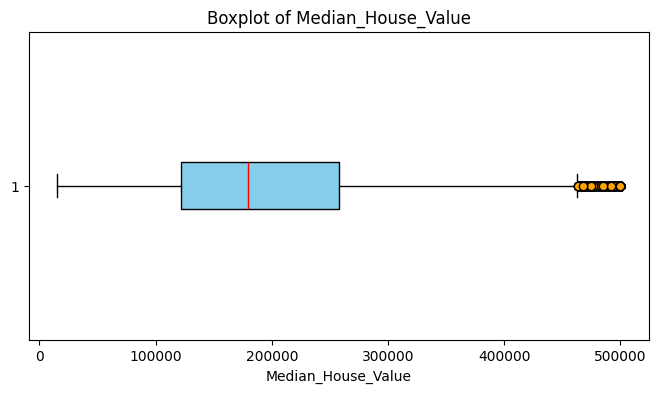

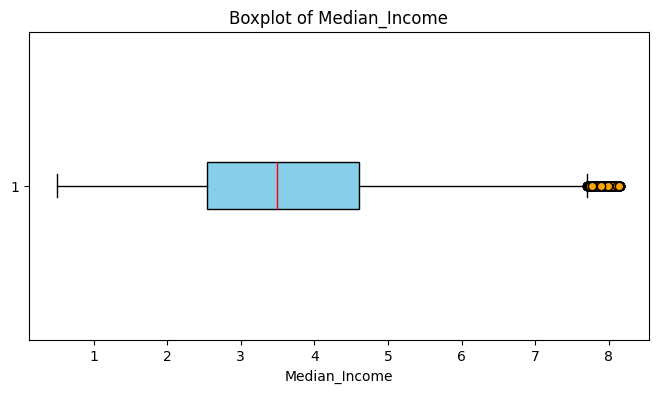

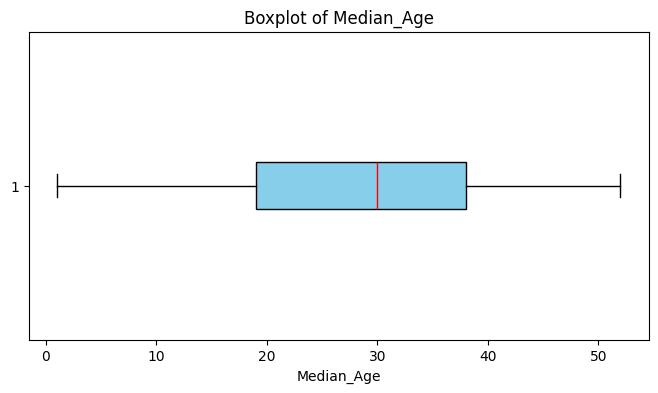

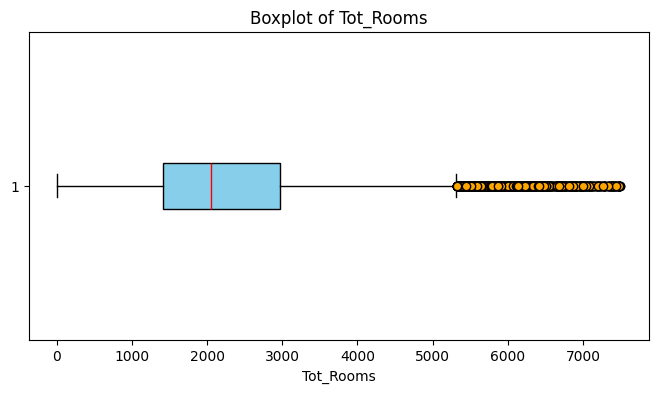

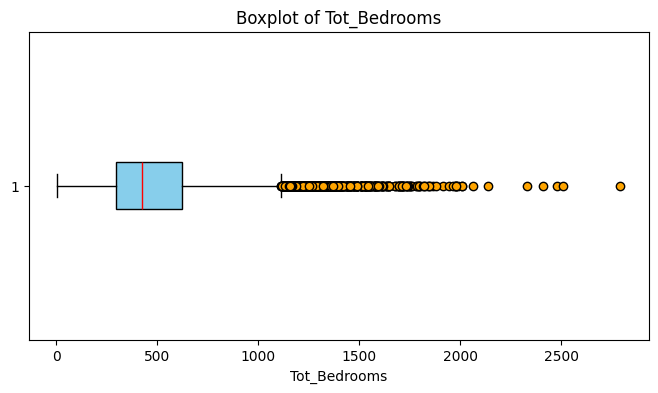

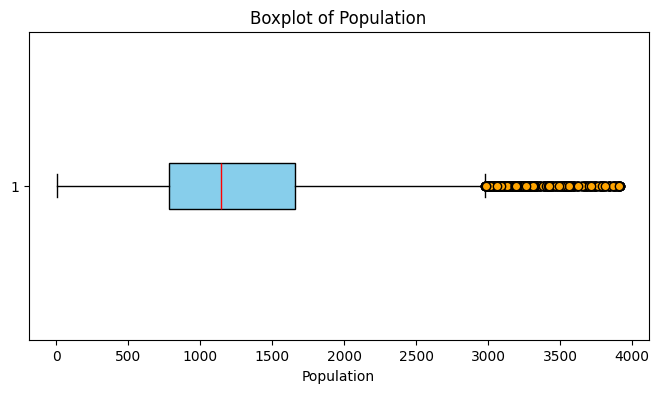

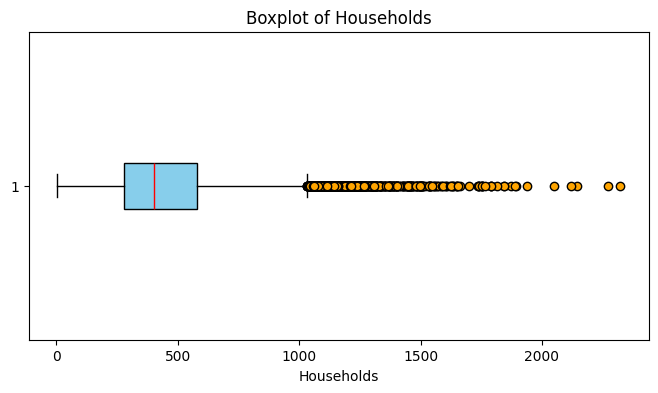

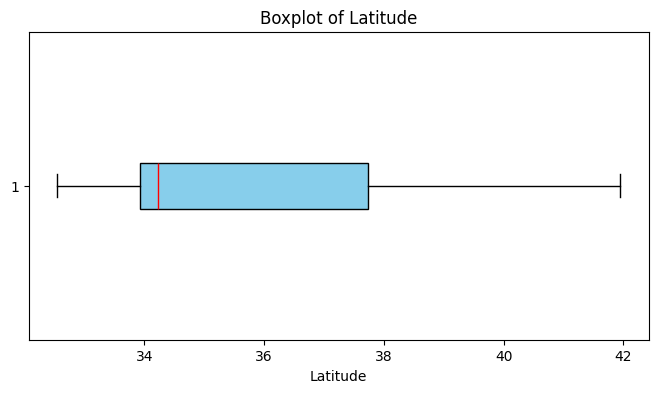

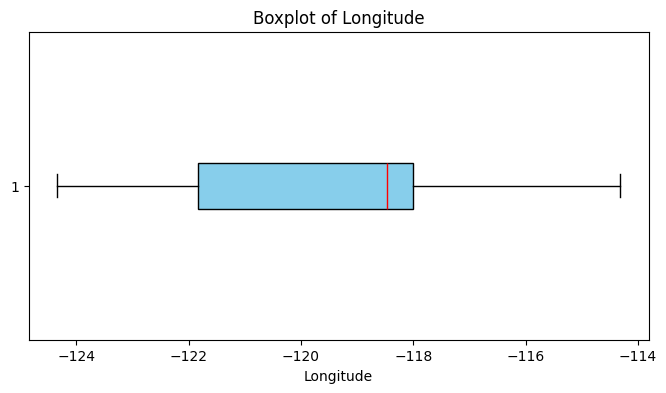

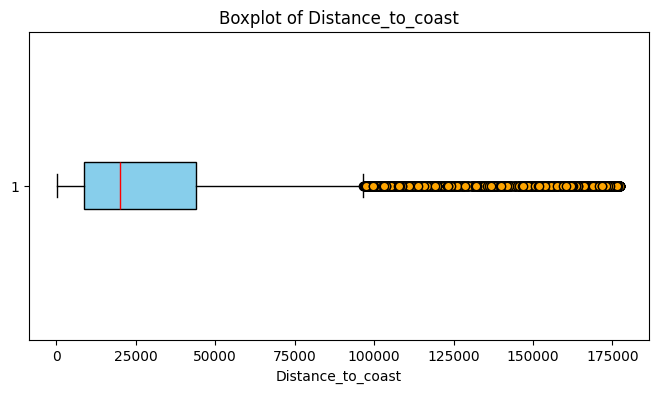

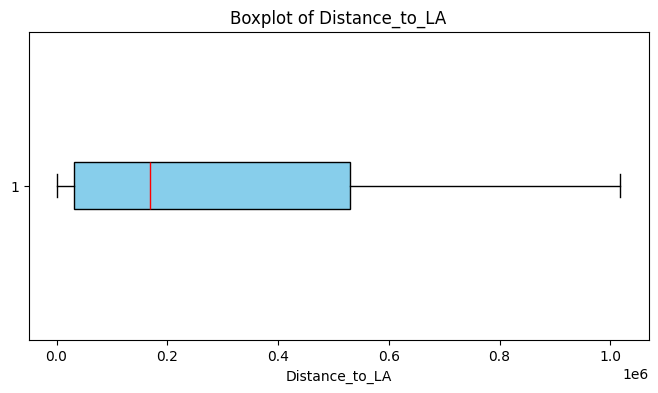

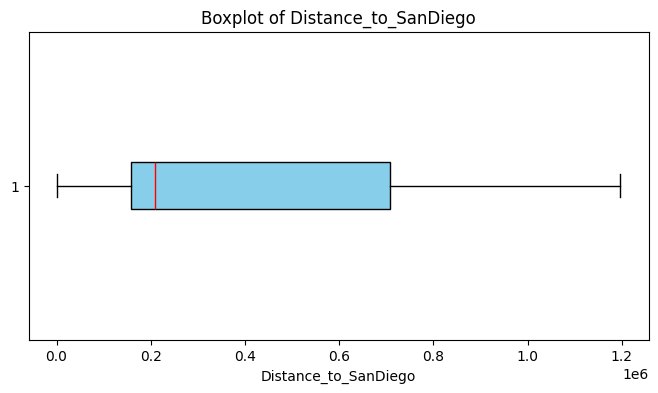

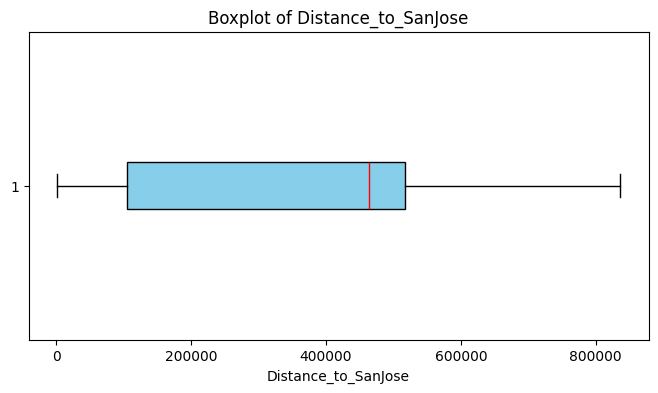

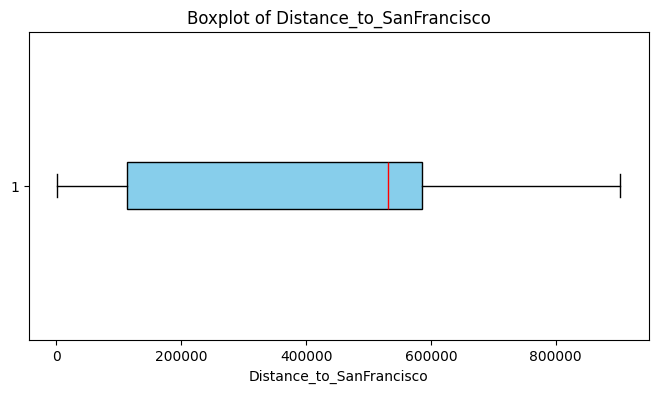

In [64]:
for x in data.columns:
  clear_boxplot(data,x)

In [66]:
data.shape

(18642, 14)

## 3.3 Análisis de correlación de variables respecto a variable Target

In [68]:
data.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [70]:
spacial_data = data[['Median_House_Value','Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
       

### 3.3.1 Evaluando variables geoespaciales

In [72]:
spacial_corr_pearson = spacial_data.corr(method='pearson')
spacial_corr_pearson

,Median_House_Value,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.00,-0.47,-0.12,-0.08,-0.05,-0.04
Distance_to_coast,-0.47,1.00,0.17,0.19,-0.07,-0.06
Distance_to_LA,-0.12,0.17,1.00,0.95,-0.80,-0.85
Distance_to_SanDiego,-0.08,0.19,0.95,1.00,-0.89,-0.93
Distance_to_SanJose,-0.05,-0.07,-0.80,-0.89,1.00,0.99
Distance_to_SanFrancisco,-0.04,-0.06,-0.85,-0.93,0.99,1.00


In [74]:
spacial_corr_spearman = spacial_data.corr(method='spearman')
spacial_corr_spearman

,Median_House_Value,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.00,-0.50,-0.17,-0.08,-0.10,-0.09
Distance_to_coast,-0.50,1.00,0.03,0.10,0.06,0.10
Distance_to_LA,-0.17,0.03,1.00,0.73,-0.60,-0.64
Distance_to_SanDiego,-0.08,0.10,0.73,1.00,-0.88,-0.92
Distance_to_SanJose,-0.10,0.06,-0.60,-0.88,1.00,0.98
Distance_to_SanFrancisco,-0.09,0.10,-0.64,-0.92,0.98,1.00


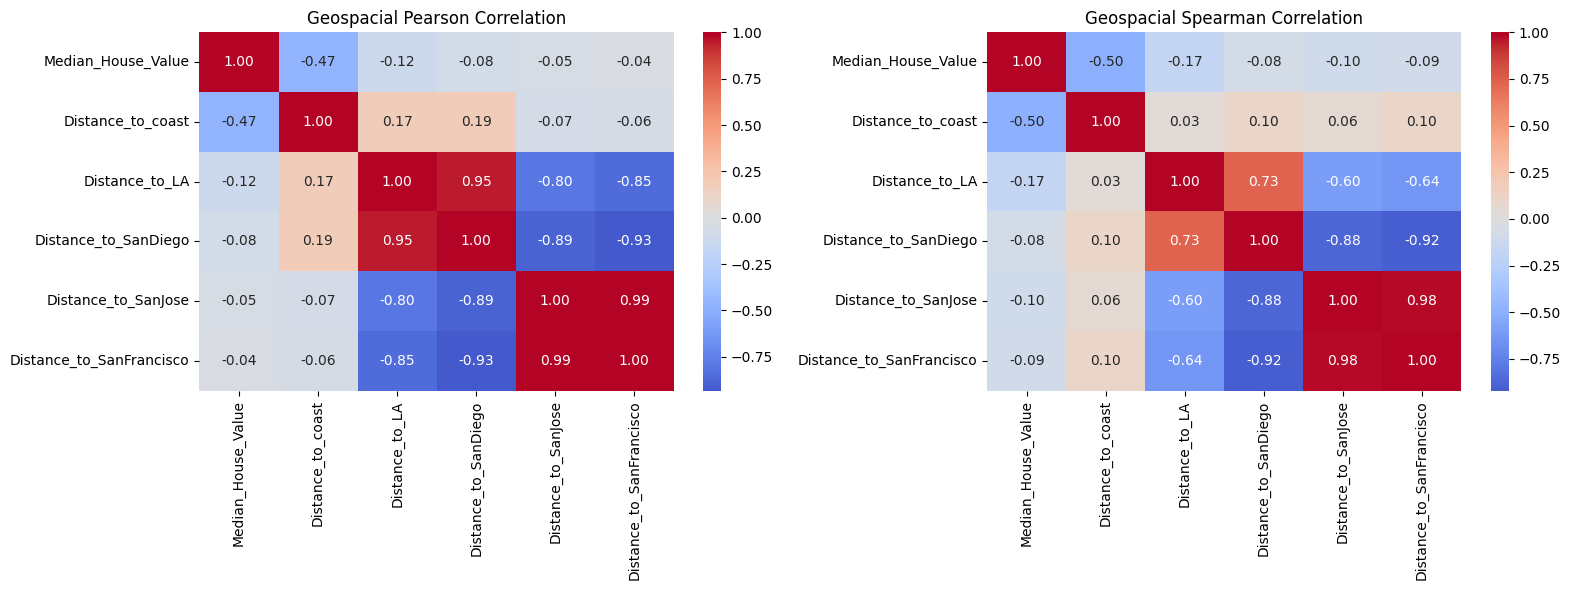

In [76]:
# 3. Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pearson heatmap
sns.heatmap(spacial_corr_pearson, ax=axes[0], annot=True, cmap='coolwarm', center=0, fmt=".2f")
axes[0].set_title("Geospacial Pearson Correlation")

# Spearman heatmap
sns.heatmap(spacial_corr_spearman, ax=axes[1], annot=True, cmap='coolwarm', center=0, fmt=".2f")
axes[1].set_title("Geospacial Spearman Correlation")

plt.tight_layout()
plt.savefig("geospacial_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

### Vemos que midiendo la correlación con Spearman obtenemos valores mayores que con Pearson respecto a la variable target 'Median_House_Value'


In [78]:
# Threshold for high correlation
threshold = 0.9

# Create a boolean mask for the upper triangle of the correlation matrix
upper = spacial_corr_spearman.where(
    np.triu(np.ones(spacial_corr_spearman.shape), k=1).astype(bool)
)

# Find columns with any correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Show the columns to be dropped
print("Columns to drop due to high correlation:")
print(to_drop)

# Drop the columns from your original dataframe (optional step)
spacial_data_reduced = spacial_corr_spearman.drop(columns=to_drop)

# Resulting reduced correlation matrix
print("\nReduced correlation matrix:")
print(spacial_data_reduced.columns)

Columns to drop due to high correlation:
['Distance_to_SanFrancisco']

Reduced correlation matrix:
Index(['Median_House_Value', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose'],
      dtype='object')


In [80]:
geospatial_data= data[['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose']]
geospatial_data.shape

(18642, 4)

### 3.3.2 Evaluando variables socioeconómicas

In [82]:
social_data =data[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households']]

In [84]:

print(social_data.corr(method='pearson').round(2))

                    Median_House_Value  Median_Income  Median_Age  Tot_Rooms  \
Median_House_Value                1.00           0.63        0.11       0.17   
Median_Income                     0.63           1.00       -0.15       0.25   
Median_Age                        0.11          -0.15        1.00      -0.34   
Tot_Rooms                         0.17           0.25       -0.34       1.00   
Tot_Bedrooms                      0.09          -0.03       -0.27       0.89   
Population                       -0.04          -0.02       -0.26       0.79   
Households                        0.11           0.00       -0.25       0.89   

                    Tot_Bedrooms  Population  Households  
Median_House_Value          0.09       -0.04        0.11  
Median_Income              -0.03       -0.02        0.00  
Median_Age                 -0.27       -0.26       -0.25  
Tot_Rooms                   0.89        0.79        0.89  
Tot_Bedrooms                1.00        0.83        0.98  
Popul

In [86]:
print(social_data.corr(method='spearman').round(2))

                    Median_House_Value  Median_Income  Median_Age  Tot_Rooms  \
Median_House_Value                1.00           0.65        0.07       0.21   
Median_Income                     0.65           1.00       -0.15       0.27   
Median_Age                        0.07          -0.15        1.00      -0.32   
Tot_Rooms                         0.21           0.27       -0.32       1.00   
Tot_Bedrooms                      0.11          -0.01       -0.27       0.91   
Population                        0.00          -0.00       -0.25       0.80   
Households                        0.13           0.03       -0.25       0.91   

                    Tot_Bedrooms  Population  Households  
Median_House_Value          0.11        0.00        0.13  
Median_Income              -0.01       -0.00        0.03  
Median_Age                 -0.27       -0.25       -0.25  
Tot_Rooms                   0.91        0.80        0.91  
Tot_Bedrooms                1.00        0.86        0.98  
Popul

In [88]:
social_corr_pearson = social_data.corr(method='pearson').round(2)
social_corr_pearson

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households
Median_House_Value,1.00,0.63,0.11,0.17,0.09,-0.04,0.11
Median_Income,0.63,1.00,-0.15,0.25,-0.03,-0.02,0.00
Median_Age,0.11,-0.15,1.00,-0.34,-0.27,-0.26,-0.25
Tot_Rooms,0.17,0.25,-0.34,1.00,0.89,0.79,0.89
Tot_Bedrooms,0.09,-0.03,-0.27,0.89,1.00,0.83,0.98
Population,-0.04,-0.02,-0.26,0.79,0.83,1.00,0.87
Households,0.11,0.00,-0.25,0.89,0.98,0.87,1.00


In [90]:
social_corr_spearman = social_data.corr(method='spearman').round(2)
social_corr_spearman

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households
Median_House_Value,1.00,0.65,0.07,0.21,0.11,0.00,0.13
Median_Income,0.65,1.00,-0.15,0.27,-0.01,-0.00,0.03
Median_Age,0.07,-0.15,1.00,-0.32,-0.27,-0.25,-0.25
Tot_Rooms,0.21,0.27,-0.32,1.00,0.91,0.80,0.91
Tot_Bedrooms,0.11,-0.01,-0.27,0.91,1.00,0.86,0.98
Population,0.00,-0.00,-0.25,0.80,0.86,1.00,0.89
Households,0.13,0.03,-0.25,0.91,0.98,0.89,1.00


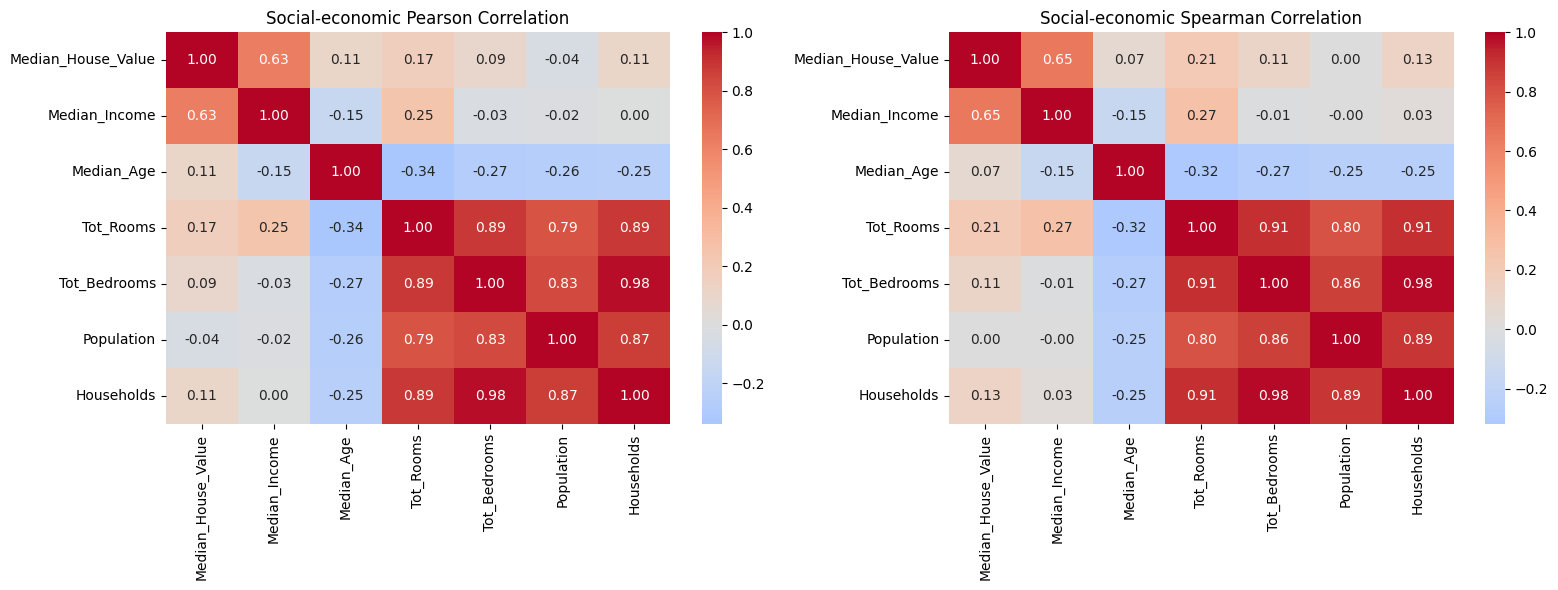

In [92]:
# 3. Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pearson heatmap
sns.heatmap(social_corr_pearson, ax=axes[0], annot=True, cmap='coolwarm', center=0, fmt=".2f")
axes[0].set_title("Social-economic Pearson Correlation")

# Spearman heatmap
sns.heatmap(social_corr_spearman, ax=axes[1], annot=True, cmap='coolwarm', center=0, fmt=".2f")
axes[1].set_title("Social-economic Spearman Correlation")

plt.tight_layout()
plt.savefig("social_economic_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

### Comparando las variables socioeconómicas con 'Median_House_Value' vemos que 4 de las 6 variables son mayores midiendo con el método Spearman

In [94]:


# Threshold for high correlation
threshold = 0.9

# Create a boolean mask for the upper triangle of the correlation matrix
upper = social_corr_spearman.where(
    np.triu(np.ones(social_corr_spearman.shape), k=1).astype(bool)
)

# Find columns with any correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Show the columns to be dropped
print("Columns to drop due to high correlation:")
print(to_drop)

# Drop the columns from your original dataframe (optional step)
social_data_reduced = social_corr_spearman.drop(columns=to_drop)

# Resulting reduced correlation matrix
print("\nReduced correlation matrix:")
print(social_data_reduced.columns)


Columns to drop due to high correlation:
['Tot_Bedrooms', 'Households']

Reduced correlation matrix:
Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Population'],
      dtype='object')


In [96]:
social_ec_data = data[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms','Population']]
social_ec_data.shape

(18642, 5)

### Unimos los dataframes resultantes de eliminar las columnas debido a su alta correlación 

In [98]:
data_corr = pd.concat([geospatial_data,social_ec_data],axis=1)
data_spacial = data[['Latitude', 'Longitude']]
data = pd.concat([data_spacial, data_corr],axis=1)
data.shape

(18642, 11)

# **4. Construcción de Modelos**


---

## 4.1 Creamos particiones para entrenamiento y test

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error


In [102]:
X = data.drop('Median_House_Value', axis=1)
y = data['Median_House_Value']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Prueba del modelo con variables 'Longitud' y 'Latitud' con XGBoost

In [106]:
print(X_train.columns)
X_train_coord = X_train[['Latitude', 'Longitude']]


Index(['Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose', 'Median_Income',
       'Median_Age', 'Tot_Rooms', 'Population'],
      dtype='object')


In [108]:
X_train_coord.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,14913.0,35.61,2.13,32.55,33.93,34.23,37.73,41.95
Longitude,14913.0,-119.60,2.03,-124.35,-121.83,-118.47,-118.01,-114.31


In [110]:
rango_lat = np.linspace(32.55,41.95,101)
rango_long = np.linspace(-124.35,-114.31,101)
combinacion = np.array(np.meshgrid(rango_lat, rango_long)).T.reshape(-1,2)
df_combinacion = pd.DataFrame(combinacion, columns=['Latitude', 'Longitude'])
df_combinacion.head()

,Latitude,Longitude
0,32.55,-124.35
1,32.55,-124.25
2,32.55,-124.15
3,32.55,-124.05
4,32.55,-123.95


In [112]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1)
# Entrenar el modelo
model.fit(X_train_coord, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [114]:
df_combinacion['Predicted'] = model.predict(df_combinacion)
y_pred = model.predict(X_test[['Latitude', 'Longitude']])

<Axes: xlabel='Latitude', ylabel='Longitude'>

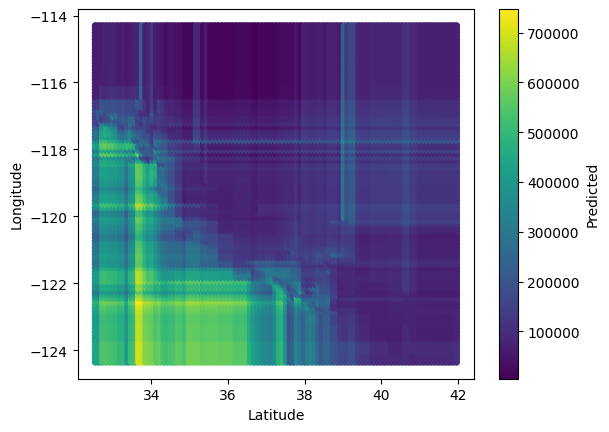

In [116]:
df_combinacion.plot.scatter(x='Latitude', y='Longitude', c='Predicted',colormap="viridis")

<Axes: xlabel='Latitude', ylabel='Longitude'>

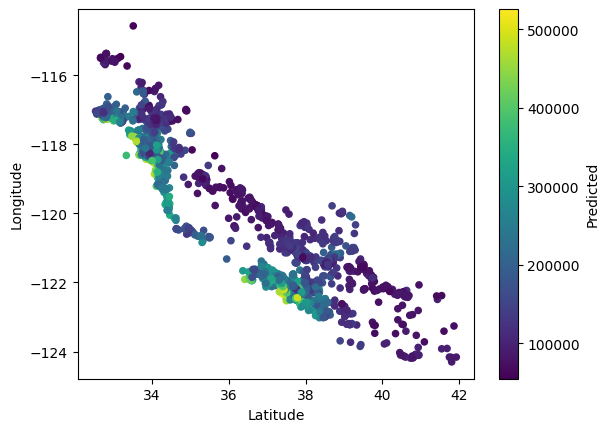

In [118]:
X_test_plot = X_test.copy()
X_test_plot['Predicted'] = y_pred
X_test_plot.plot.scatter(x='Latitude', y='Longitude', c='Predicted', colormap="viridis")


## 4.3 Modelo XGBoost

### Evaluando modelo básico con la API nativa de XGBoost

In [120]:
# Paso 1: Convertir los datos de entrenamiento y prueba al formato DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [122]:
# Paso 2: Definir los parámetros del modelo
params = {"objective": 'reg:squarederror'}# tipo de modelo: regresión con error cuadrático
# Paso 3: Número de árboles (boosting rounds
n = 300
# Paso 4: Entrenar el modelo
model=xgb.train(params = params, dtrain= dtrain, num_boost_round= n)
# Paso 5: Hacer predicciones con los datos de prueba
pred = model.predict(dtest)

In [124]:
# Paso 6: Calcular el error cuadrático medio (RMSE)
rmse = root_mean_squared_error(dtest.get_label(), pred)
print(f'RMSE: {rmse:.2f}')

RMSE: 44685.94


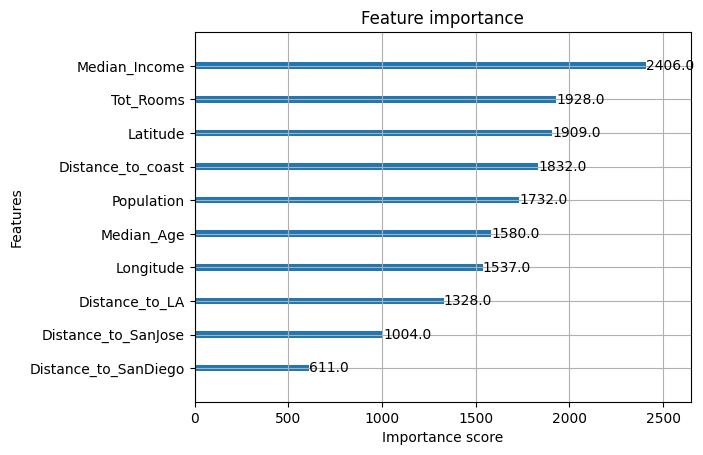

In [128]:
# Paso 7: Mostrar la importancia de las características o variables
xgb.plot_importance(model)
plt.show()

In [130]:
# Paso 8 : Entrenar nuevamente pero usando evaluación y early stopping
params = {"objective": 'reg:squarederror'}
n = 300
evals = [(dtrain,"training"), (dtest, "validation")]
model=xgb.train(params = params, dtrain= dtrain, num_boost_round= n, evals = evals, early_stopping_rounds = 20, verbose_eval= 20)

[0]	training-rmse:88285.77315	validation-rmse:88263.97178
[20]	training-rmse:41824.61710	validation-rmse:47493.36718
[40]	training-rmse:35755.21093	validation-rmse:45883.34471
[60]	training-rmse:32319.45019	validation-rmse:45313.04002
[80]	training-rmse:29365.62528	validation-rmse:45230.02507
[100]	training-rmse:26968.23639	validation-rmse:44878.30127
[120]	training-rmse:24998.24280	validation-rmse:44785.13337
[140]	training-rmse:23298.92196	validation-rmse:44612.36289
[160]	training-rmse:21657.89587	validation-rmse:44694.10567
[169]	training-rmse:21130.23700	validation-rmse:44660.34428


### 4.3.1 Ejecutando validación cruzada

In [132]:
# Paso 1: Definir los parámetros del modelo
params = {"objective": 'reg:squarederror'}

# Paso 2: Validación cruzada con XGBoost
cv_results = xgb.cv(dtrain=dtrain, # conjunto de entrenamiento en formato DMatrix
                    params=params,# parámetros del modelo
                    nfold=5,# número de folds (k=5), es decir, 5 particiones
                    num_boost_round=300,# máximo de árboles a construir
                    early_stopping_rounds = 20,# se detiene si no mejora el RMSE de validación en 20 rondas
                    metrics="rmse",# métrica a optimizar: root mean squared error
                    as_pandas= True, # el resultado se devuelve como un DataFrame
                    seed= 1234 # semilla para reproducibilidad
                   )

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,88242.07,366.41,88790.03,1578.30
1,76049.37,255.86,77167.15,1667.46
2,68194.64,460.44,69980.18,1421.69
3,62158.71,738.86,64505.32,1071.34
4,58409.35,616.18,61414.22,976.10
...,...,...,...,...
157,19841.12,222.27,47433.97,513.52
158,19750.31,220.54,47422.83,523.02
159,19691.11,219.64,47416.41,518.97
160,19611.11,190.65,47409.70,509.10


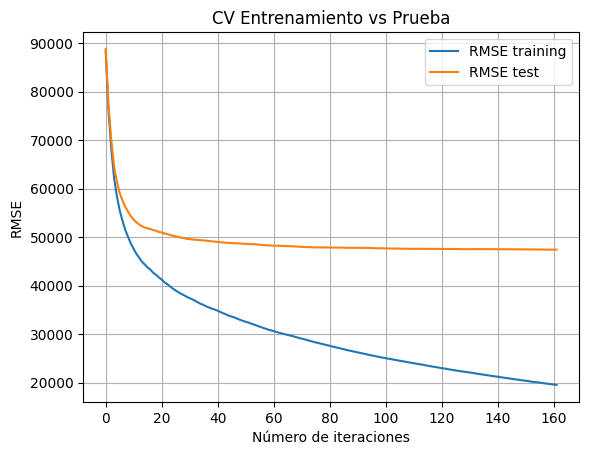

In [134]:
# Paso 3: Visualización del error en entrenamiento y validación
iterations = range(len(cv_results))
plt.plot(iterations, cv_results["train-rmse-mean"], label="RMSE training")
plt.plot(iterations, cv_results["test-rmse-mean"], label="RMSE test")
plt.title("CV Entrenamiento vs Prueba")
plt.xlabel("Número de iteraciones")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()



### 4.3.2 Buscando mejorar hiperparámetros con GridSearchCV

In [136]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [138]:
# Paso 1: Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100,200,300],# número de árboles
    'colsample_bytree' : [0.6, 0.8, 1],# proporción de columnas a usar por árbol
    'learning_rate': [0.01, 0.05, 0.1],# tasa de aprendizaje (eta)
    'max_depth': [3, 5, 7]# profundidad máxima de los árboles
}

In [140]:
# Paso 2: Crear el modelo base de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [142]:
# Paso 3: Ejecutar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_grid,
              scoring = "neg_mean_squared_error",# negativo porque sklearn maximiza por defecto
              cv = 5,# validación cruzada de 5 pliegues *
              verbose = 1 #muestra información básica mientras se ejecuta el GridSearchCV.A más valor, más detalle
)
# *El modelo entrena 5 veces, dejando 1 fold como conjunto de validación y entrenando con los 4 restantes. El puntaje final es el promedio de esos 5 resultados

In [144]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [145]:
# Paso 4: Mostrar los mejores resultados encontrados por GridSearchCV
print(f'Best parameters : {grid_search.best_params_}')
print(f'Best RMSE : {np.sqrt(np.abs(grid_search.best_score_)):.2f}')

Best parameters : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best RMSE : 45867.66


In [148]:
# Show best hyperparameters and corresponding RMSE
print(f'Best parameters : {grid_search.best_params_}')
print(f'Best RMSE : {np.sqrt(np.abs(grid_search.best_score_)):.2f}')

Best parameters : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best RMSE : 45867.66


[0]	entrenamiento-rmse:100148.74689	validacion-rmse:100697.07065
[100]	entrenamiento-rmse:31561.96514	validacion-rmse:43556.18158
[200]	entrenamiento-rmse:24677.01333	validacion-rmse:42516.17188
[300]	entrenamiento-rmse:20446.38130	validacion-rmse:42153.38879
[329]	entrenamiento-rmse:19461.10413	validacion-rmse:42144.66076


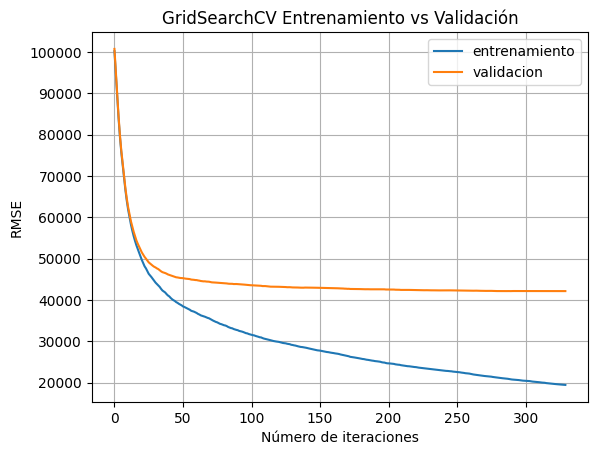

In [150]:
# Paso 5: Entrenar el modelo final con los mejores parámetros
params = {"objective": 'reg:squarederror', 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7}
eval_result = {}
model = xgb.train(params = params,
                  dtrain= dtrain,
                  num_boost_round= 1000, # Se puede usar un número grande gracias a early stopping
                  early_stopping_rounds = 20,
                  verbose_eval =100,
                  evals = [(dtrain, 'entrenamiento'),(dtest,'validacion')],
                  evals_result = eval_result)

# Paso 6: Graficar el RMSE en cada iteración para entrenamiento y validación
train_rmse = eval_result['entrenamiento']['rmse']
validation_rmse = eval_result['validacion']['rmse']
plt.plot(train_rmse, label="entrenamiento")
plt.plot(validation_rmse, label="validacion")
plt.title("GridSearchCV Entrenamiento vs Validación")
plt.xlabel("Número de iteraciones")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.savefig("training_validation_xgboost_gridsearch.png", dpi=300, bbox_inches='tight')
plt.show()

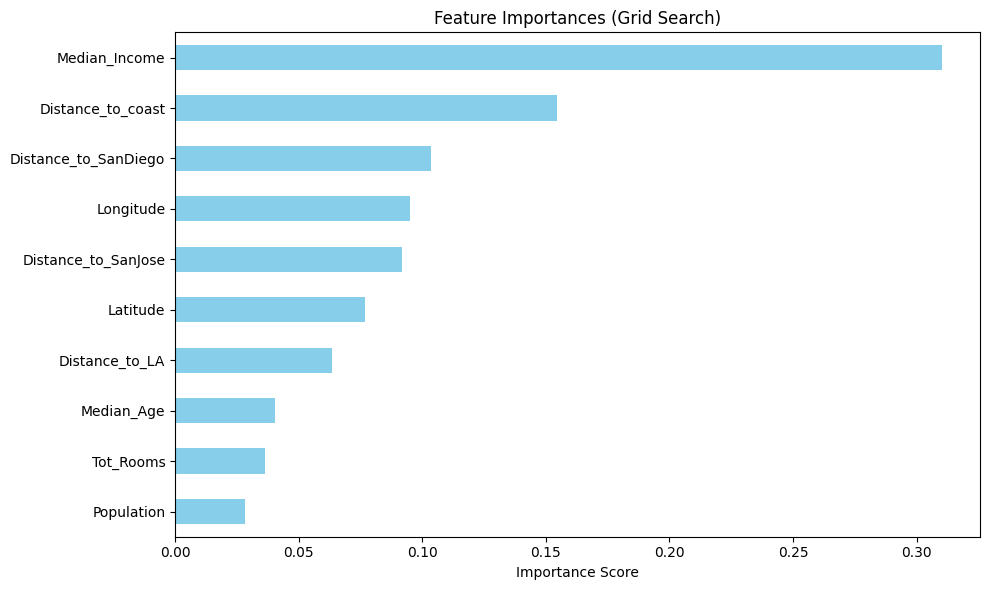

In [152]:


# Paso 7: Obtener el mejor modelo de GridSearch
best_model = grid_search.best_estimator_

# Obtener importancia de características
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Graficar
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances (Grid Search)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importance_xgboost_gridsearch.png", dpi=300, bbox_inches='tight')
plt.show()


### 4.3.3 Evaluando el modelo final

In [154]:
# Paso 1: Definir los hiperparámetros finales del modelo (basado en GridSearchCV o validación previa)
params = {"objective": 'reg:squarederror', 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7}
# Paso 2: Entrenar el modelo final con el número óptimo de iteraciones
modelo_final = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round = 350  # número de iteraciones/árboles definidos
)

# Paso 3: Realizar predicciones sobre el conjunto de prueba
preds = modelo_final.predict(dtest)
# Paso 4: Calcular RMSE (raíz del error cuadrático medio)
rmse = root_mean_squared_error(dtest.get_label(), preds)
# Paso 5: Calcular R² (coeficiente de determinación)
r2 = r2_score(dtest.get_label(), preds)
# Paso 6: Mostrar métricas de evaluación
print(f"\n✅ Test RMSE (Best Model): {rmse:.2f}")
print(f"✅ Test R² Score (Best Model): {r2:.2f}")


✅ Test RMSE (Best Model): 42094.11
✅ Test R² Score (Best Model): 0.85


### 4.3.4 Validando el modelo final con cross validation

In [156]:
# Parámetros finales del modelo
params = {"objective": 'reg:squarederror', 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7}

# Ejecutar validación cruzada de 5 folds con early stopping
cv_results = xgb.cv(dtrain=dtrain,
                    params=params,
                    nfold=5,  # número de particiones (folds)
                    num_boost_round=500, # número máximo de iteraciones (árboles)
                    early_stopping_rounds = 20, # se detiene si no mejora en 20 rondas
                    metrics="rmse", # métrica que queremos minimizar
                    as_pandas= True, # devuelve un DataFrame
                    seed= 1234 # para reproducibilidad
                   )


# Mostrar resultados de la validación cruzada
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,100242.50,387.59,100529.96,1698.52
1,94770.69,399.11,95294.77,1562.52
2,89051.66,354.76,89894.20,1491.21
3,83987.64,320.36,85135.61,1471.23
4,79380.42,279.53,80826.37,1436.48
...,...,...,...,...
495,12896.57,221.45,45637.02,420.28
496,12872.31,211.35,45636.93,422.06
497,12850.28,212.92,45633.79,420.30
498,12825.37,213.56,45634.91,421.68


#### 📊 ¿Qué muestra cv_results?
Es un DataFrame cuyas columnas son:

train-rmse-mean: promedio del RMSE en entrenamiento a lo largo de los folds.

train-rmse-std: desviación estándar del RMSE en entrenamiento.

test-rmse-mean: promedio del RMSE en validación (esta es la que más te interesa).

test-rmse-std: variabilidad del error en los folds.

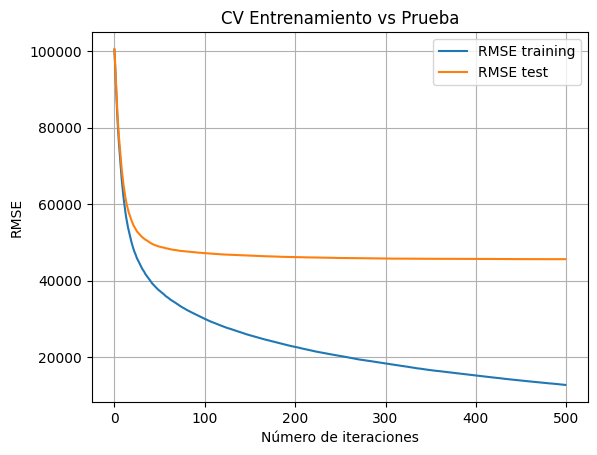

In [157]:
iterations = range(len(cv_results))
plt.plot(iterations, cv_results["train-rmse-mean"], label="RMSE training")
plt.plot(iterations, cv_results["test-rmse-mean"], label="RMSE test")
plt.title("CV Entrenamiento vs Prueba")
plt.xlabel("Número de iteraciones")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()



### 4.3.5 Validando el modelo final con la mejor iteración

In [160]:
#Extraer el mejor número de iteraciones desde cv_results:
best_iteration = cv_results["test-rmse-mean"].idxmin()

#Entrenar un nuevo modelo final (xgb_model_final) con ese best_iteration:

xgb_model_final = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_iteration
)



In [162]:
# Evaluar este nuevo modelo sobre dtest:
y_pred_xgb = xgb_model_final.predict(dtest)
rmse_xgb = np.sqrt(mean_squared_error(dtest.get_label(), y_pred_xgb))
r2_xgb = r2_score(dtest.get_label(),y_pred_xgb)

print(f"✅ RMSE final en test: {rmse:.2f}")
print(f"✅ R² final en test: {r2:.2f}")


✅ RMSE final en test: 42094.11
✅ R² final en test: 0.85


## 4.4 Modelo Lightgbm

### 4.4.1 Evaluando modelo Lightgbm básico

In [164]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [166]:


# Crear datasets de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros básicos
params = {
    'objective': 'regression', # Tipo de problema: regresión (predicción de valores continuos)
    'metric': 'rmse', # Métrica de evaluación: raíz del error cuadrático medio
    'learning_rate': 0.1, # Tamaño del paso que da el modelo en cada iteración (más bajo = más preciso, pero más lento)
    'max_depth': 5, # Profundidad máxima de los árboles (controla la complejidad para evitar overfitting)
    'num_leaves': 64, # Número máximo de hojas por árbol (también controla la complejidad)
    'colsample_bytree': 0.8 # Fracción de columnas utilizadas por árbol (mejora la generalización)
    }
     

# Entrenar modelo básico
eval_result = {}
model_basic = lgb.train(
    params=params, # Diccionario de hiperparámetros definidos arriba
    train_set=train_data, # Conjunto de entrenamiento, en formato lgb.Dataset
    valid_sets=[train_data, test_data], # Conjuntos a evaluar durante el entrenamiento (entrenamiento y validación)
    valid_names=['entrenamiento', 'validacion'],
    num_boost_round=500, # Número máximo de iteraciones (árboles) que se intentarán entrenar
    callbacks=[lgb.early_stopping(stopping_rounds=20), # Detiene el entrenamiento si no mejora en 20 rondas consecutivas
               lgb.log_evaluation(50), # Muestra logs de evaluación cada 50 iteraciones
               lgb.record_evaluation(eval_result)  # <-- esto graba los resultados en eval_result
              ]
    )


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 14913, number of used features: 10
[LightGBM] [Info] Start training from score 202460.727352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [168]:
# Predicciones modelo básico
y_pred_basic = model_basic.predict(X_test, num_iteration=model_basic.best_iteration)
rmse_basic = root_mean_squared_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print(f"\n✅ RMSE Modelo Básico: {rmse_basic:.2f}")
print(f"✅ R2 Score Modelo Básico: {r2_basic:.2f}")


✅ RMSE Modelo Básico: 43129.26
✅ R2 Score Modelo Básico: 0.84


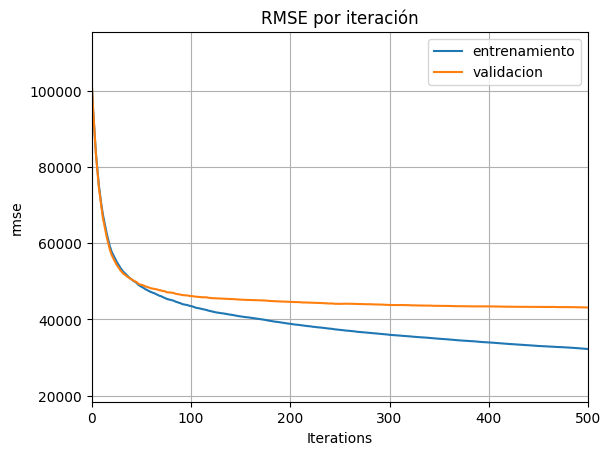

In [170]:
lgb.plot_metric(eval_result, metric='rmse')
plt.title("RMSE por iteración")
plt.show()


### 4.4.2 Ejecutando validación cruzada

In [172]:
# Parámetros iniciales
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 5,
    'num_leaves': 64,
    'colsample_bytree': 0.8,
    'seed': 1234
    }

# Ejecutar CV
cv_result = lgb.cv(
    params=params,
    train_set=train_data,
    num_boost_round=1000,
    nfold=5,
    stratified=False,
    shuffle=True,
    seed=42,
    callbacks=[lgb.early_stopping(stopping_rounds=20),  lgb.log_evaluation(50)]
   
)

cv_result = pd.DataFrame(cv_result)
cv_result





[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 11928, number of used features: 10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 11928, number of used features: 10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 11928, number of used features: 10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=t

,valid rmse-mean,valid rmse-stdv
0,102609.33,1661.60
1,97043.35,1649.00
2,92274.77,1657.21
3,88088.67,1670.61
4,84551.54,1676.35
...,...,...
788,45782.82,472.87
789,45783.02,473.47
790,45781.32,476.07
791,45778.25,474.36


In [173]:
# Obtenemos el mejor número de iteraciones (boosting rounds)
best_iter = len(cv_result['valid rmse-mean']) #boosting rounds
best_rmse = cv_result['valid rmse-mean'] #mejor RMSE promedio en validación



In [176]:
#Optimizando el modelo básico con boosting rounds
model_cv = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, test_data],
    valid_names=['entrenamiento', 'validacion'],
    num_boost_round=best_iter,
    callbacks=[lgb.early_stopping(stopping_rounds=20), # Detiene el entrenamiento si no mejora en 20 rondas consecutivas
               lgb.log_evaluation(50), # Muestra logs de evaluación cada 50 iteraciones
               lgb.record_evaluation(eval_result)  # <-- esto graba los resultados en eval_result
              ]
    )
 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 14913, number of used features: 10
[LightGBM] [Info] Start training from score 202460.727352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [178]:
# Hacemos las predicciones y evaluaciones del modelo optimizado con CV
y_pred_cv = model_cv.predict(X_test)
rmse_cv = root_mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)
print(f"\n✅ RMSE Modelo CV: {rmse_cv:.2f}")
print(f"✅ R2 Score Modelo CV: {r2_cv:.2f}")


✅ RMSE Modelo CV: 42719.14
✅ R2 Score Modelo CV: 0.84


### Comparamos el modelo básico con el modelo optimizado con validación cruzada

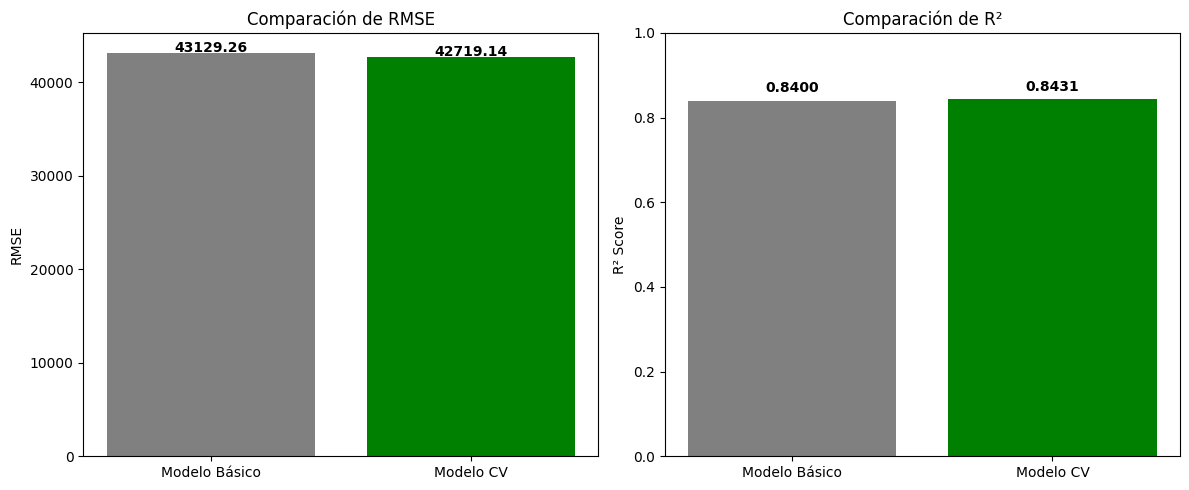

In [180]:


model_names = ["Modelo Básico", "Modelo CV"]
rmse_scores = [rmse_basic, rmse_cv]
r2_scores = [r2_basic, r2_cv]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RMSE
axes[0].bar(model_names, rmse_scores, color=['gray', 'green'])
axes[0].set_title("Comparación de RMSE")
axes[0].set_ylabel("RMSE")
for i, v in enumerate(rmse_scores):
    axes[0].text(i, v + 100, f"{v:.2f}", ha='center', fontweight='bold')

# R²
axes[1].bar(model_names, r2_scores, color=['gray', 'green'])
axes[1].set_title("Comparación de R²")
axes[1].set_ylabel("R² Score")
axes[1].set_ylim([0, 1])
for i, v in enumerate(r2_scores):
    axes[1].text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### 4.4.3 Buscando mejorar hiperparámetros con GridSearchCV

In [182]:
from sklearn.model_selection import GridSearchCV
# Definir grid de parámetros para LightGBM
param_grid = {
    'n_estimators': [100, 300, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.6, 0.8, 1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],   
}


# Crear modelo LightGBM
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    random_state=42,
    verbose=-1
)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1  # Usar todos los procesadores disponibles
)

print("Iniciando Grid Search...")
grid_search.fit(X_train, y_train)


Iniciando Grid Search...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='regression', random_state=42,
                                     verbose=-1),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 600],
                         'num_leaves': [31, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [183]:
print(f'Best parameters : {grid_search.best_params_}')
print(f'Best RMSE : {np.sqrt(np.abs(grid_search.best_score_)):.2f}')

Best parameters : {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 600, 'num_leaves': 100}
Best RMSE : 45482.41


Training until validation scores don't improve for 20 rounds
[50]	entrenamiento's l2: 2.07598e+09	validacion's l2: 2.2142e+09
[100]	entrenamiento's l2: 1.66261e+09	validacion's l2: 2.01783e+09
[150]	entrenamiento's l2: 1.42805e+09	validacion's l2: 1.94728e+09
[200]	entrenamiento's l2: 1.27085e+09	validacion's l2: 1.90522e+09
[250]	entrenamiento's l2: 1.14498e+09	validacion's l2: 1.88391e+09
[300]	entrenamiento's l2: 1.04205e+09	validacion's l2: 1.86696e+09
[350]	entrenamiento's l2: 9.58396e+08	validacion's l2: 1.85193e+09
Early stopping, best iteration is:
[372]	entrenamiento's l2: 9.25547e+08	validacion's l2: 1.84207e+09


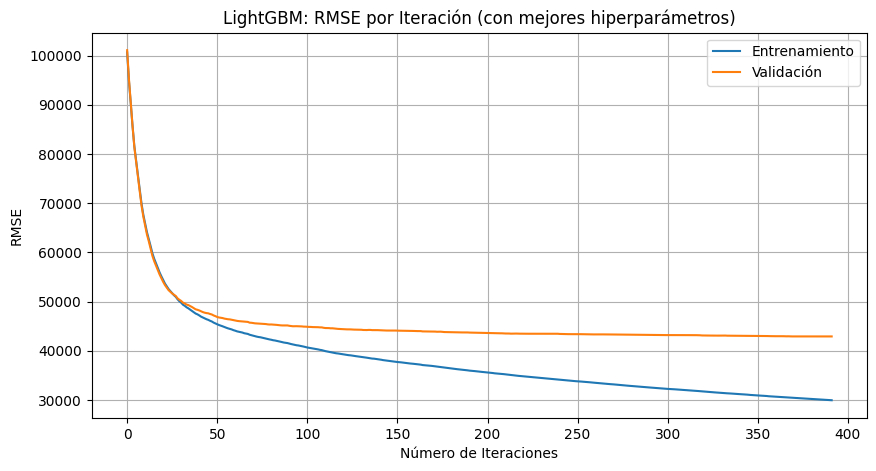

In [188]:
params = {"objective": 'regression', 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7,'n_estimators': 600, 'num_leaves': 31}

# Paso 3: Diccionario para guardar resultados
eval_result = {}

# Paso 4: Entrenar el modelo con seguimiento de métricas
model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, test_data],
    valid_names=["entrenamiento", "validacion"],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(50),
        lgb.record_evaluation(eval_result)
    ]
)


# Paso 5: Extraer y graficar el RMSE por iteración
train_rmse = np.sqrt(eval_result['entrenamiento']['l2'])
valid_rmse = np.sqrt(eval_result['validacion']['l2'])

plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label="Entrenamiento")
plt.plot(valid_rmse, label="Validación")
plt.title("LightGBM: RMSE por Iteración (con mejores hiperparámetros)")
plt.xlabel("Número de Iteraciones")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.savefig("training_validation_lightgbm_gridsearch.png", dpi=300, bbox_inches='tight')
plt.show()

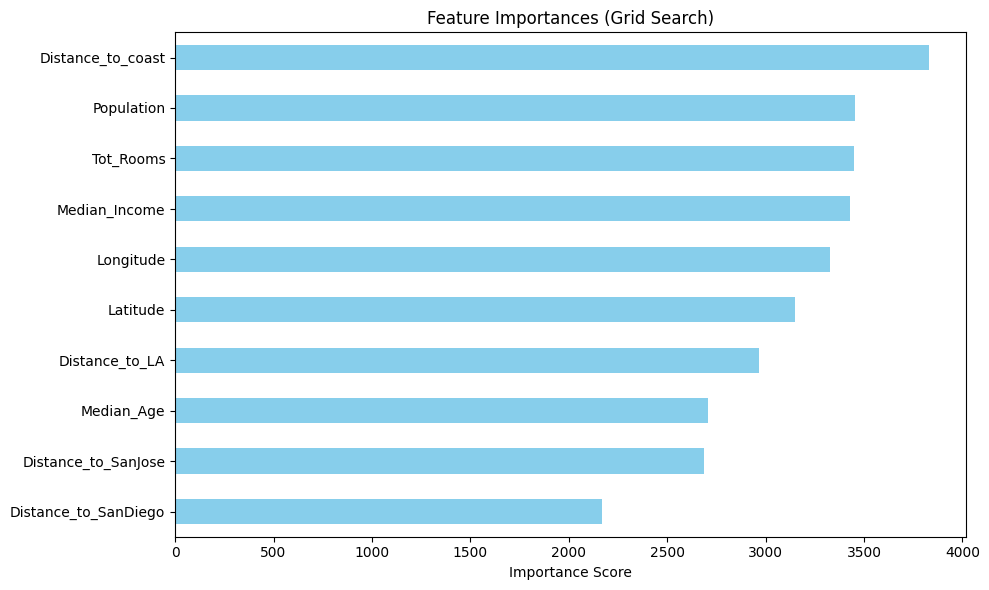

In [190]:
# Paso 7: Obtener el mejor modelo de GridSearch
best_model = grid_search.best_estimator_

# Obtener importancia de características
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Graficar
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances (Grid Search)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importance_lightgbm_gridsearch.png", dpi=300, bbox_inches='tight')
plt.show()


### 4.4.4 Validando el modelo final con cross validation

In [192]:


# Paso 1: Obtener el mejor modelo del GridSearchCV
modelo_final = grid_search.best_estimator_

# Paso 2: Realizar predicciones sobre el conjunto de prueba
preds = modelo_final.predict(X_test)

# Paso 3: Calcular RMSE (raíz del error cuadrático medio)
rmse = root_mean_squared_error(y_test, preds)

# Paso 4: Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, preds)

# Paso 5: Mostrar métricas de evaluación
print(f"\n✅ Test RMSE (Best Model): {rmse:.2f}")
print(f"✅ Test R² Score (Best Model): {r2:.2f}")



✅ Test RMSE (Best Model): 42540.64
✅ Test R² Score (Best Model): 0.84


In [194]:
# Paso 1: Definir los hiperparámetros finales
params = {
    "objective": "regression",
    "metric": "rmse",
    "colsample_bytree": 0.8,
    "learning_rate": 0.1,
    "max_depth": 7,
    "num_leaves": 31
}

# Paso 2: Ejecutar validación cruzada
cv_results = lgb.cv(
    params=params,
    train_set=train_data,
    nfold=5,
    num_boost_round=1000,
    metrics="rmse",
    stratified=False,
    seed=42,
    return_cvbooster= False, 
    callbacks=[lgb.early_stopping(stopping_rounds=20),lgb.log_evaluation(50)]
)


# Paso 3: Mostrar el resultado final
cv_results = pd.DataFrame(cv_results)


Training until validation scores don't improve for 20 rounds
[50]	valid's rmse: 50084 + 504.724
[100]	valid's rmse: 47719.4 + 483.172
[150]	valid's rmse: 46796 + 418.936
[200]	valid's rmse: 46382.4 + 413.702
[250]	valid's rmse: 46101.9 + 401.718
[300]	valid's rmse: 45927 + 410.866
[350]	valid's rmse: 45788.5 + 408.141
[400]	valid's rmse: 45734 + 391.842
[450]	valid's rmse: 45673.9 + 418.531
[500]	valid's rmse: 45598.7 + 437.707
Early stopping, best iteration is:
[516]	valid's rmse: 45589.5 + 445.644


In [196]:
# Ejecutar CV
cv_result = lgb.cv(
    params=params,
    train_set=train_data,
    num_boost_round=1000,
    nfold=5,
    stratified=False,
    shuffle=True,
    seed=42,
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

cv_result = pd.DataFrame(cv_result)
cv_result.tail()

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[516]	valid's rmse: 45589.5 + 445.644


,valid rmse-mean,valid rmse-stdv
511,45601.10,439.46
512,45599.92,445.55
513,45597.74,443.56
514,45590.95,448.61
515,45589.49,445.64


In [198]:
# Extraer el número de iteración con menor RMSE
best_iteration = cv_result["valid rmse-mean"].idxmin()
print(f"✅ Mejor número de iteraciones: {best_iteration}")

✅ Mejor número de iteraciones: 515


In [200]:
lgb_model_final = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, test_data],
    valid_names=['entrenamiento', 'validacion'],
    num_boost_round=best_iter,
    callbacks=[lgb.early_stopping(stopping_rounds=20), # Detiene el entrenamiento si no mejora en 20 rondas consecutivas
               lgb.log_evaluation(50), # Muestra logs de evaluación cada 50 iteraciones
               lgb.record_evaluation(eval_result)  # <-- esto graba los resultados en eval_result
              ]
)

Training until validation scores don't improve for 20 rounds
[50]	entrenamiento's rmse: 45563	validacion's rmse: 47055.3
[100]	entrenamiento's rmse: 40775.1	validacion's rmse: 44920.2
[150]	entrenamiento's rmse: 37789.5	validacion's rmse: 44128
[200]	entrenamiento's rmse: 35649	validacion's rmse: 43648.9
[250]	entrenamiento's rmse: 33837.6	validacion's rmse: 43404.1
[300]	entrenamiento's rmse: 32280.8	validacion's rmse: 43208.3
[350]	entrenamiento's rmse: 30958	validacion's rmse: 43034
Early stopping, best iteration is:
[372]	entrenamiento's rmse: 30422.8	validacion's rmse: 42919.3


In [202]:
y_pred_lgb = lgb_model_final.predict(X_test)
rmse_lgb = root_mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f"\n✅ RMSE Modelo CV: {rmse_cv:.2f}")
print(f"✅ R2 Score Modelo CV: {r2_cv:.2f}")



✅ RMSE Modelo CV: 42719.14
✅ R2 Score Modelo CV: 0.84


# 5. Evaluación y Selección del Modelo


---

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [208]:
# Predicciones
y_pred_xgb = xgb_model_final.predict(dtest)
y_pred_lgb = lgb_model_final.predict(X_test)  # Asegúrate que X_test sea un DataFrame y no un Dataset de LightGBM

# Métricas para XGBoost
#rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Métricas para LightGBM
#rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100


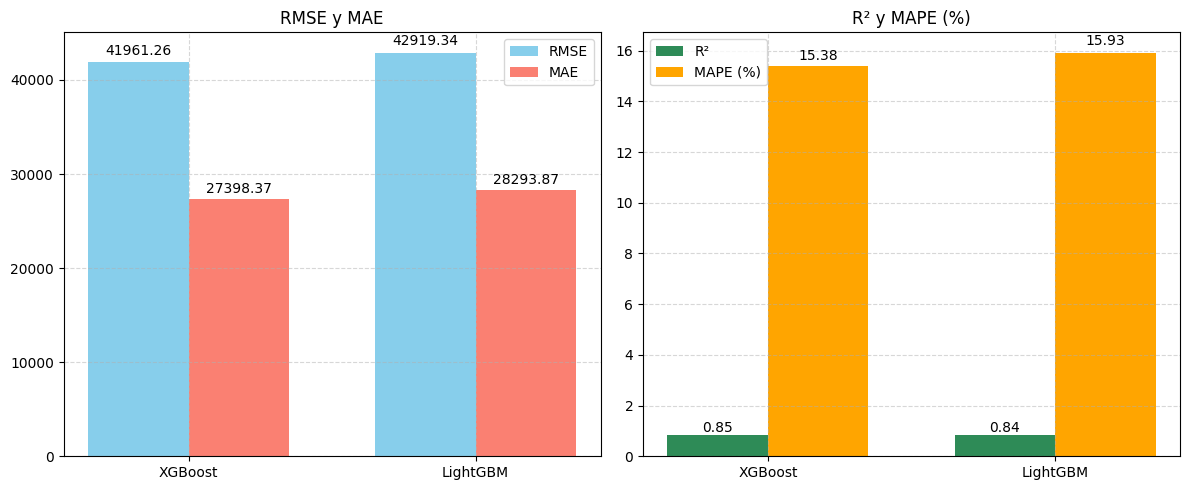

In [210]:
# Datos para los gráficos
models = ['XGBoost', 'LightGBM']
rmse_mae = [[rmse_xgb, rmse_lgb], [mae_xgb, mae_lgb]]
r2_mape = [[r2_xgb, r2_lgb], [mape_xgb, mape_lgb]]

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
width = 0.35
x = np.arange(len(models))

# Gráfico para RMSE y MAE
bars1 = axs[0].bar(x - width/2, rmse_mae[0], width, label='RMSE', color='skyblue')
bars2 = axs[0].bar(x + width/2, rmse_mae[1], width, label='MAE', color='salmon')
axs[0].set_title('RMSE y MAE')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# Añadir los valores encima de cada barra
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01 * yval, f'{yval:.2f}', ha='center', va='bottom')

# Gráfico para R² y MAPE
bars3 = axs[1].bar(x - width/2, r2_mape[0], width, label='R²', color='seagreen')
bars4 = axs[1].bar(x + width/2, r2_mape[1], width, label='MAPE (%)', color='orange')
axs[1].set_title('R² y MAPE (%)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Añadir los valores encima de cada barra
for bar_group in [bars3, bars4]:
    for bar in bar_group:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01 * abs(yval), f'{yval:.2f}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.savefig("final_comparison_xgboost_lightgbm.png", dpi=300, bbox_inches='tight')
plt.show()

## **El modelo XGBoost presenta un mejor rendimiento en las métricas mostradas**